<a href="https://colab.research.google.com/github/maryam-sabet/Breast_Classification_and_Segmentation_ultrasoundimages/blob/main/2)read_and_prepare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Libraries**

In [ ]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
import imageio
from PIL import Image
import os

#**Load an example image**

(474, 502, 3)


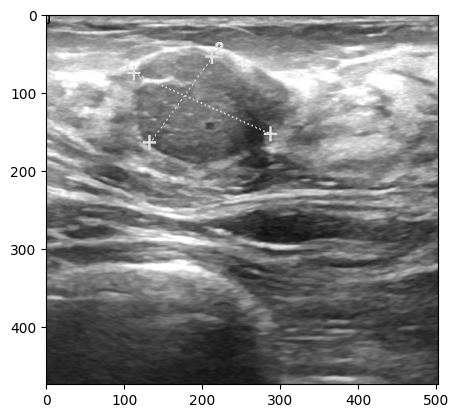

In [ ]:
image =cv2.imread("/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign (436).png")
print(image.shape)
plt.imshow(image)

(474, 502, 3)


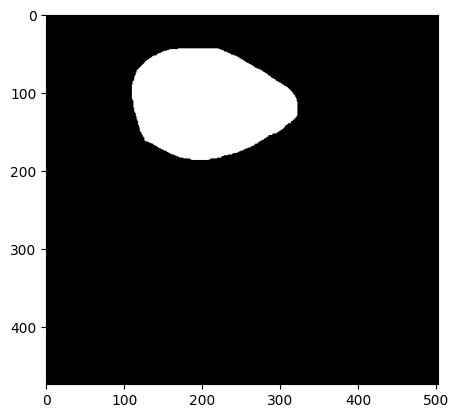

In [ ]:
image =cv2.imread("/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign (436)_mask.png")
print(image.shape)
plt.imshow(image)

#**Loading Images and edit their masks**

In [ ]:
#Read path data

path_benign =glob.glob("/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/*")
path_benign.sort() #for sorting images by their nums

path_malignant=glob.glob("/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant/*")
path_malignant.sort()

path_normal=glob.glob("/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/normal/*")
path_normal.sort()

In [ ]:
# Edit masks
for i in edit_mask:
    if i=="195":
      mask1=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign ('+i+')_mask.png')
      mask2=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign ('+i+')_mask_1.png')
      mask3=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign ('+i+')_mask_2.png')
      merg_mask = mask1+ mask2 + mask3
      cv2.imwrite('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/benign/benign ('+i+')_mask.png', merg_mask )

    else:
    mask1=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant /malignant  ('+i+')_mask.png')
    mask2=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant/malignant ('+str(i)+')_mask_1.png')
    merg_mask = mask1+ mask2
    cv2.imwrite('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant /malignant  ('+i+')_mask.png',merg_mask)


mask1=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant/malignant (53)_mask.png')
mask2=cv2.imread('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant/malignant (53)_mask_1.png')
merg_mask = mask1+ mask2
cv2.imwrite('/content/drive/MyDrive/breast cancer/Datasetbreast/Dataset_BUSI_with_GT/malignant/malignant (53)_mask.png',merg_mask)

True

In [ ]:
# Initialize lists to store images, masks, and labels
imges = list()
mask = list()
label= list()

In [ ]:
# edit_mask = list()

# Loop through the benign image paths
for path in path_benign:

  if "mask" in path:
    #  print(path)
    #  edit_mask.append((path.split("/malignant (")[1].split(")_")[0]))
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    mask.append(im1)

  else:
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    imges.append(im1)
    label.append("benign")

In [ ]:
# Loop through the malignant image paths
for path in path_malignant:

  if "mask" in path:
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    mask.append(im1)

  else:
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    imges.append(im1)
    label.append("malignant")

In [ ]:
# Loop through the normal image paths
for path in path_normal:

  if "mask" in path:
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    mask.append(im1)
  else:
    im_gray = cv2.imread(path)
    # im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    im1=cv2.resize(im_gray,(224,224),interpolation=cv2.INTER_NEAREST)
    imges.append(im1)
    label.append("normal")

In [ ]:
print(len(imges) ,len(mask) ,len(label))

780 780 780


In [ ]:
imges= np.array(imges)
mask= np.array(mask)
label = np.array(label)

In [ ]:
print(imges.shape ,mask.shape , label.shape )

(780, 224, 224, 3) (780, 224, 224, 3) (780,)


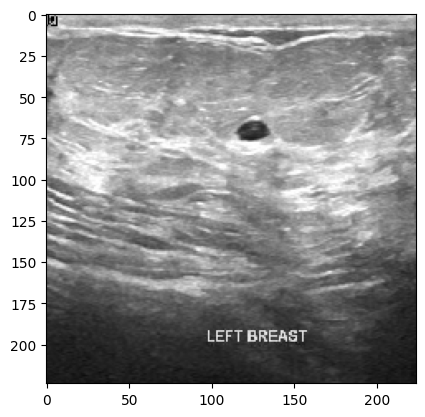

In [ ]:
imges[0].shape
plt.imshow(imges[0])

In [ ]:
Pictures = np.save ("/content/drive/MyDrive/breast cancer/Pictures.npy",imges)
Mask = np.save ("/content/drive/MyDrive/breast cancer/Mask.npy",mask)
Label = np.save ("/content/drive/MyDrive/breast cancer/Label.npy",label)

In [ ]:
Pictures = np.load ("/content/drive/MyDrive/breast cancer/Pictures.npy")
Mask = np.load ("/content/drive/MyDrive/breast cancer/Mask.npy")
Label = np.load ("/content/drive/MyDrive/breast cancer/Label.npy")

In [ ]:
print(Pictures.shape ,Mask.shape ,Label.shape)

(780, 224, 224, 3) (780, 224, 224, 3) (780,)
